# Тема 12. ЭФР. Критерий Колмогорова

In [1]:
import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.special as sp
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm

### 1 Задание

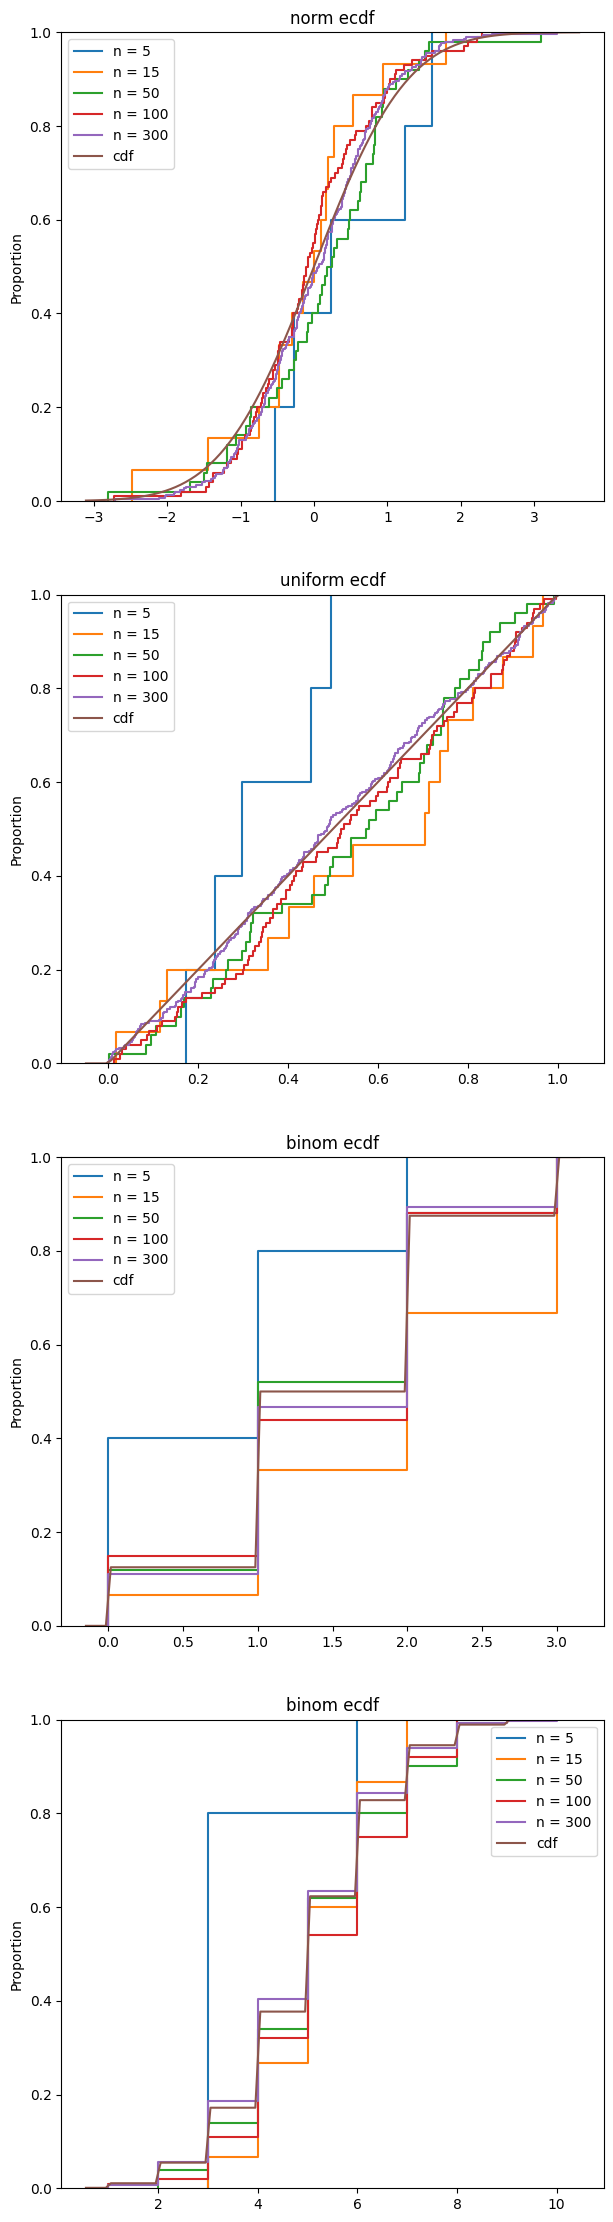

In [2]:
Ns = (5, 15, 50, 100, 300)

distributions = (
    st.norm(0, 1),
    st.uniform(0, 1),
    st.binom(3, 0.5),
    st.binom(10, 0.5)
)

width, height = 7, len(distributions) * 7
fig, axes = plt.subplots(len(distributions), 1, figsize=(width, height))
fig.subplots_adjust(hspace=0.2)

for ax, rv in zip(axes, distributions):
    for n in Ns:
        sample = rv.rvs(n)
        sns.ecdfplot(sample, ax=ax, label=f'n = {n}')
    x = np.linspace(*ax.get_xlim(), 100)
    ax.plot(x, rv.cdf(x), label=r"cdf")
    ax.set_title(f'{rv.dist.name} ecdf')
    ax.legend()

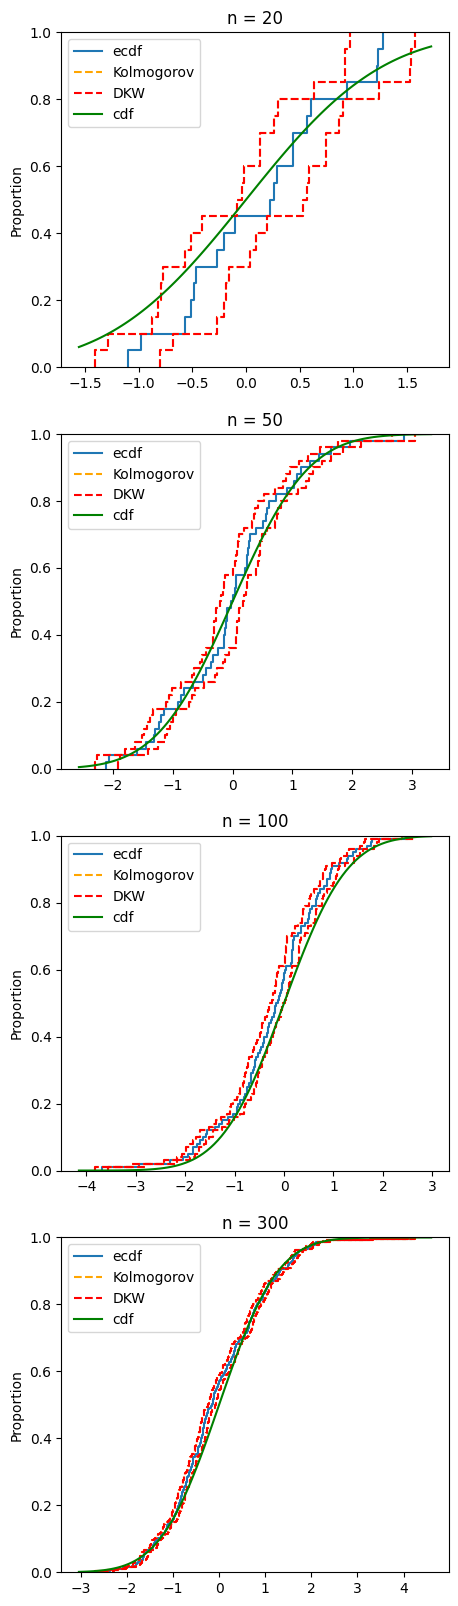

In [3]:
Ns = (20, 50, 100, 300)
rv = st.norm(0, 1)
alpha = 0.95

width, height = 5, len(distributions) * 5
fig, axes = plt.subplots(len(distributions), 1, figsize=(width, height))
fig.subplots_adjust(hspace=0.2)

for ax, n in zip(axes, Ns):
    sample = rv.rvs(n)
    sns.ecdfplot(sample, ax=ax, label='ecdf')

    y = sp.kolmogi(1 - alpha)
    sns.ecdfplot(sample + y / mt.sqrt(n), c='orange', ls='--', ax=ax, label='Kolmogorov')
    sns.ecdfplot(sample - y / mt.sqrt(n), c='orange', ls='--', ax=ax)

    y = mt.sqrt(1 / (2 * n) * mt.log(2 / (1 - alpha)))
    sns.ecdfplot(sample + y, c='r', ls='--', ax=ax, label='DKW')
    sns.ecdfplot(sample - y, c='r', ls='--', ax=ax)
    
    x = np.linspace(*ax.get_xlim(), 100)
    ax.plot(x, rv.cdf(x), c='g', label='cdf')
    
    ax.set_title(f'n = {n}')
    ax.legend()

### 2 Задание

In [10]:
def plot_p_value(ax, sample, mu, sigma, name):
    k = sample.shape[0]
    x = np.linspace(0, 1, k)
    sample = (sample - mu) / sigma
    p_value = np.zeros(k)
    for i in range(k):
        p_value[i] = st.kstest(sample[i], "norm").pvalue
    p_value = np.sort(p_value)
    ax.plot(p_value, x, label=name)

In [20]:
def draw(ax, n, m_arr):
    ax.set_title(f"n = {n}")
    
    k = 100
    x = np.linspace(0, 1, k)
    ax.plot(x, x)

    

    mu, sigma = -3, 8**0.5
    sample = st.norm.rvs(loc=mu, scale=sigma, size=(k, n))
    plot_p_value(ax, sample, mu, sigma, r"$\mathcal{N}(0, 1)$")
    
    for m in m_arr:
        p = 0.5
        mu, sigma = m * p, mt.sqrt(m * p * (1 - p))
        sample = st.binom.rvs(m, p, size=(k, n))
        plot_p_value(ax, sample, mu, sigma, fr"$Binom({m}, {p})$")

    for m in m_arr:
        mu, sigma = m / 2, (m / 12)**0.5
        sample = np.sum(st.uniform.rvs(size=(k, n, m)), axis=2)
        plot_p_value(ax, sample, mu, sigma, fr"$IH({m})$")

    ax.legend()

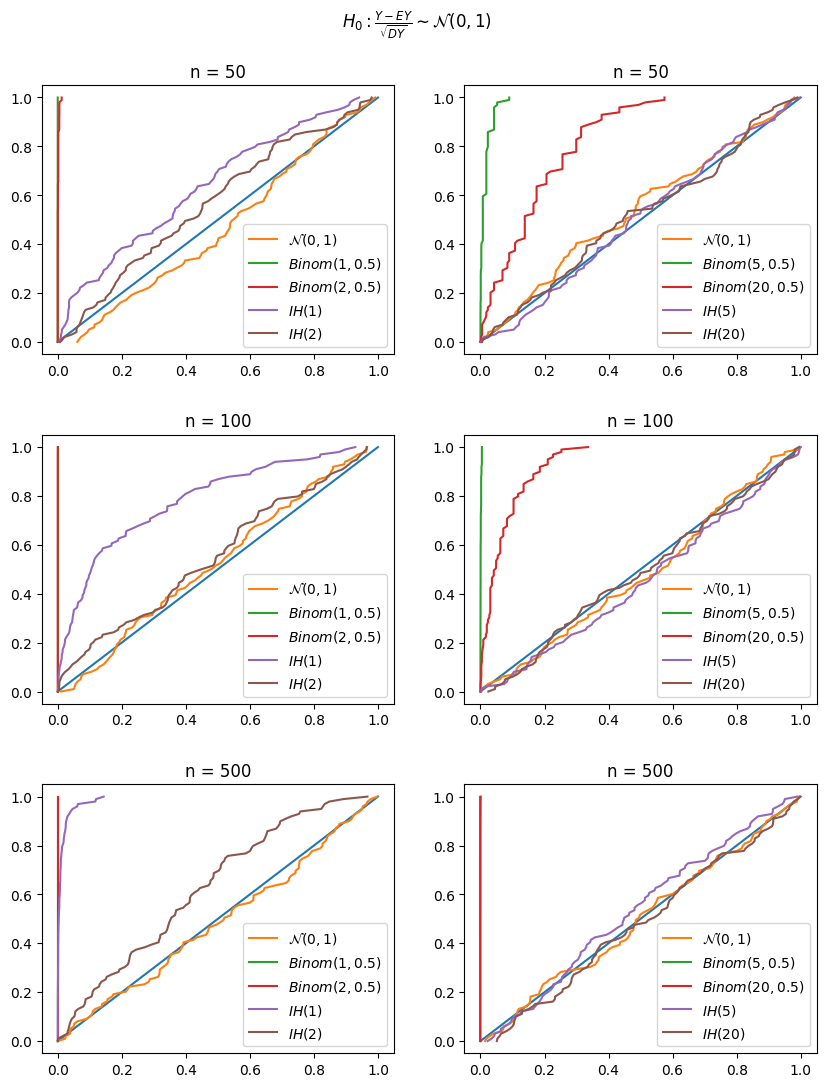

In [22]:
Ns = [50, 100, 500]
m1 = [1, 2]
m2 = [5, 20]

width, height = 2 * 5, len(Ns) * 4
fig, axes = plt.subplots(len(Ns), 2, figsize=(width, height))
fig.subplots_adjust(top = 1 - 1/height, hspace=0.3)

fig.suptitle(r"$H_0: \frac{Y - EY}{\sqrt{DY}} \sim \mathcal{N}(0, 1)$")

for n, ax in zip(Ns, axes):
    draw(ax[0], n, m1)
    draw(ax[1], n, m2)

### 3 Задание

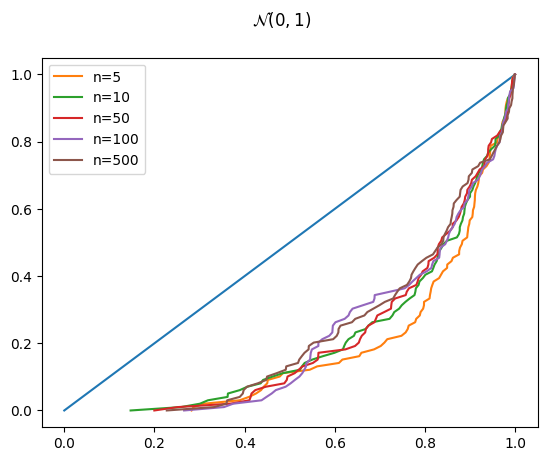

In [18]:
k = 100
Ns = [5, 10, 50, 100, 500]

mu, sigma = 0, 1
rv = st.norm(loc=mu, scale=sigma)

fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle(r"$\mathcal{N}" + f"({mu}, {sigma})$")

x = np.linspace(0, 1, k)
ax.plot(x, x)

for n in Ns:
    sample = rv.rvs(size=(k, n))
    
    sample_mean = np.mean(sample, axis=1)
    sample_std = np.sqrt(np.var(sample, axis=1))
    
    sample_mean = np.repeat(sample_mean.reshape(-1, 1), n, axis=1)
    sample_std = np.repeat(sample_std.reshape(-1, 1), n, axis=1)
    
    plot_p_value(ax, sample, sample_mean, sample_std, name=f"n={n}")

ax.legend();